Q1. Build linear and logistic regression using gradient descent on numpy only (Do not use other libraries like sklearn). Dataset for linear regressions can be found [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Dataset for logistic regression can be found [here](https://drive.google.com/file/d/1CReNesgs3iqZi08rr5a1h0YOci0BmC6H/view). The main focus here is not the accuracy of the model but the implementation of these algorithms from scratch. 

Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view). \
[movie_metadata.csv](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'numpy'

In [3]:
df = pd.read_csv(r"C:\Users\KUDSIT\Desktop\rahul\databeat-task\Databeat AI\ML\dataset\winequality-red.csv",sep=";")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# df['quality'].value_counts()

In [6]:
# df.info()

In [7]:
# df.describe()

In [8]:
# df.shape

In [9]:
# round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

In [10]:
# round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

In [11]:
# No missing / Null value in either rows or columns

dub_df=df.copy()
dub_df.drop_duplicates(subset=None,inplace=True)

In [12]:
print(dub_df.shape)
print(df.shape)

# The shape is not same. Hence there were duplicate values in the dataset

df=dub_df

(1359, 12)
(1599, 12)


In [13]:
# checks Junk/Unknown values in the entire dataset

# for col in df:
#     print(df[col].value_counts(ascending=False), '\n\n\n')

In [14]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [15]:
df_train.shape

(951, 12)

In [16]:
df_test.shape

(408, 12)

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

In [43]:
w=0
b=0

In [44]:
def hypothesis(b, w, X):
    return b+w*X
def cost_calc(b, w, X, y):
    return (1/2*m) * np.sum((hypothesis(b, w, X) - y)**2)

https://miro.medium.com/max/282/1*5_3TeXfjy-2uTXEe1dms9A.png

In [45]:
m = len(df)
def gradient_descent(b,w, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = hypothesis(b,w, X)
        # print(hx)
        b -= alpha*(np.sum(hx - y)/m)
        w -= (alpha * np.sum((hx - y) * X))/m
        cost.append(cost_calc(b,w, X, y))
        i += 1
    return b,w, cost

In [46]:
def predict(b, w, X, y, epoch, alpha):
    b, w, cost = gradient_descent(b, w, X, y, epoch, alpha)
    return hypothesis(b, w, X), cost, b, w

In [47]:
# def predict(theta, X, y, epoch, alpha):
#     theta, cost = gradient_descent(theta, X, y, epoch, alpha)
#     return hypothesis(theta, X), cost, theta

In [48]:
x = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
y = ["quality"]

In [49]:
y_predict, cost, b, w = predict(b, w , df[x], df[y], 10, 0.01)

In [51]:
print(b, w)

alcohol                 0.0
chlorides               0.0
citric acid             0.0
density                 0.0
fixed acidity           0.0
free sulfur dioxide     0.0
pH                      0.0
quality                 0.0
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
dtype: float64 alcohol                 0.0
chlorides               0.0
citric acid             0.0
density                 0.0
fixed acidity           0.0
free sulfur dioxide     0.0
pH                      0.0
quality                 0.0
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
dtype: float64


ValueError: x and y must be the same size

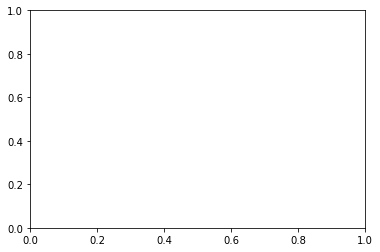

In [54]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure()
# plt.scatter(df[x], df[y], label = 'Original y')
# plt.scatter(df[x], y_predict, label = 'predicted y')
# plt.legend(loc = "upper left")
# plt.xlabel("input feature")
# plt.ylabel("Original and Predicted Output")
# plt.show()

Q2. Use pandas to extract insights on this [dataset](https://drive.google.com/file/d/1Fwxy08NgMAVcUvsRVd94KEiqgmYSvOKA/view)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\This PC\Desktop\task\databeat-task\Databeat AI\ML\dataset\movie_metadata.csv")

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
len(df)

5043

In [7]:
df.shape

(5043, 28)

In [9]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [11]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [15]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [16]:
df["color"] == "NaN"

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: color, Length: 5043, dtype: bool

In [18]:
df.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')